## Transaction Veri Setinin Analizinin Yapılması

In [31]:
import time
import json
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option("display.precision", 2)
frac = 0.00002

Veri satırı her bir satırda JSON türünde verilerden oluştuğu için (dosyanın kendisi geçerli bir json değildir) dosyadaki veri seti satır satır okunup bir araya getirilmiştir. Ayırca boş string ifadeleri NaN ile değiştirilmiştir.

In [32]:
directory = r'./Datasets/transactions.txt'

with open(directory) as txt_file:
    lines = txt_file.readlines()

dataset = []
for line in lines:
    dataset.append(json.loads(line))

dataset = pd.DataFrame(dataset)
dataset = dataset.replace(r'', np.NaN)

## Özniteliklerin incelenmesi

In [33]:
dataset.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [34]:
print("Satır Sayısı: {}".format(dataset.shape[0]))
print("Öznitelik Syısı: {}".format(dataset.shape[1]))
print("Fraud İşlem Sayısı: {}".format(dataset[dataset['isFraud'] == 1].shape[0]))

Satır Sayısı: 786363
Öznitelik Syısı: 29
Fraud İşlem Sayısı: 12417


In [35]:
dataset.sample(frac=frac)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
266456,380680241,380680241,5000.0,529.48,2016-10-19T17:16:24,235.98,Fresh Flowers,US,US,05,...,NaN,4470.52,NaN,NaN,NaN,False,NaN,NaN,False,False
529375,948561932,948561932,10000.0,6575.79,2016-02-19T18:21:50,193.06,EZ Putt Putt #503815,US,US,09,...,NaN,3424.21,NaN,NaN,NaN,True,NaN,NaN,False,False
782664,717908491,717908491,2500.0,2407.13,2016-04-08T22:23:07,0.71,34th BBQ #166379,US,US,02,...,NaN,92.87,NaN,NaN,NaN,True,NaN,NaN,False,False
222066,420205115,420205115,7500.0,2035.17,2016-08-26T18:48:52,140.39,1st Sandwitch Bar #941288,US,US,02,...,NaN,5464.83,NaN,NaN,NaN,True,NaN,NaN,False,False
56094,246251253,246251253,5000.0,4265.20,2016-08-27T23:16:29,84.30,In-N-Out #39952,US,US,02,...,NaN,734.80,NaN,NaN,NaN,True,NaN,NaN,False,True
207088,990304907,990304907,7500.0,4580.73,2016-09-20T06:39:29,108.73,Ray's Fries #745083,US,US,05,...,NaN,2919.27,NaN,NaN,NaN,True,NaN,NaN,False,False
731181,839863227,839863227,5000.0,372.84,2016-10-19T14:16:00,2.83,1st BBQ,US,US,02,...,NaN,4627.16,NaN,NaN,NaN,True,NaN,NaN,False,False
176036,379443741,379443741,5000.0,2839.13,2016-03-24T12:10:15,594.72,ethanallen.com,US,US,02,...,NaN,2160.87,NaN,NaN,NaN,True,NaN,NaN,False,False
239207,316786235,316786235,20000.0,11969.66,2016-03-20T20:09:55,86.12,alibaba.com,US,US,09,...,NaN,8030.34,NaN,NaN,NaN,False,NaN,NaN,False,False
114150,236923795,236923795,10000.0,3402.38,2016-08-15T04:31:22,84.01,AMC #74121,US,US,05,...,NaN,6597.62,NaN,NaN,NaN,True,NaN,NaN,False,False


Verilerin sütunlara göre kaç adet non-null veri içerdiği ve veri tipinin gösterimi yapılmıştır.

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

Sütunlardaki null sayıları kontrol edilip sadece null ile dolu olan sütunlar düşürülmüştür.

In [37]:
dataset.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

In [38]:
dataset.drop(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd'], axis=1, inplace=True)

Null dolu olan öznitelikler düşürüldükten sonra tekrardan veri setinin bilgileri gösterilmiştir.

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [40]:
dataset.isnull().sum()

accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  4562
merchantCountryCode          724
posEntryMode                4054
posConditionCode             409
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
dtype: int64

Eksik Değerlerin Görselleştirilmesi

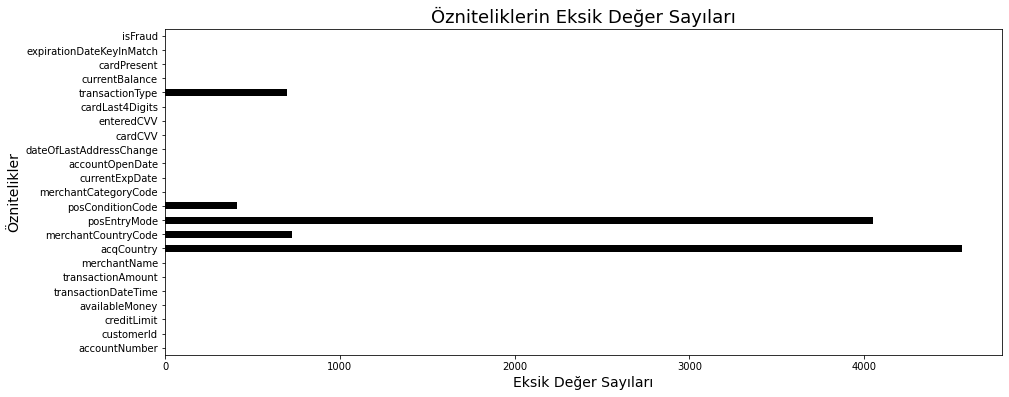

In [41]:
plt.figure(figsize=(15,6))
dataset.isnull().sum().plot(kind = 'barh', color='black')
plt.xlabel('Eksik Değer Sayıları', fontsize=14)
plt.ylabel('Öznitelikler', fontsize=14)
plt.title('Özniteliklerin Eksik Değer Sayıları', fontsize=18)
plt.show();

In [42]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
creditLimit,786363.0,10759.46,11636.17,250.00,5000.00,7500.00,15000.00,50000.00
availableMoney,786363.0,6250.73,8880.78,-1005.63,1077.42,3184.86,7500.00,50000.00
transactionAmount,786363.0,136.99,147.73,0.00,33.65,87.90,191.48,2011.54
currentBalance,786363.0,4508.74,6457.44,0.00,689.91,2451.76,5291.10,47498.81


Kategorik Değişkenlerin de incelenmesi görülmüştür.

In [43]:
dataset.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
accountNumber,786363,5000,380680241,32850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customerId,786363,5000,380680241,32850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
creditLimit,786363.0,NaN,NaN,NaN,10759.46,11636.17,250.0,5000.0,7500.0,15000.0,50000.0
availableMoney,786363.0,NaN,NaN,NaN,6250.73,8880.78,-1005.63,1077.42,3184.86,7500.0,50000.0
transactionDateTime,786363,776637,2016-12-25T14:04:15,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transactionAmount,786363.0,NaN,NaN,NaN,136.99,147.73,0.0,33.65,87.9,191.48,2011.54
merchantName,786363,2490,Uber,25613,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acqCountry,781801,4,US,774709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchantCountryCode,785639,4,US,778511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
posEntryMode,782309,5,05,315035,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Kategorik Özniteliklerin incelenmesi

In [44]:
categoricalColumns = dataset.select_dtypes(include = ["object"])

In [45]:
categoricalColumns.sample(frac=frac)

,accountNumber,customerId,transactionDateTime,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType
784307,473474510,473474510,2016-06-05T21:55:16,EZ Putt Putt #551896,US,US,09,01,entertainment,01/2032,2013-01-26,2013-01-26,496,496,2472,PURCHASE
490414,809852517,809852517,2016-12-06T02:10:35,Wendys #39414,US,US,05,08,fastfood,04/2021,2015-07-09,2016-05-08,150,150,7274,PURCHASE
741200,976149510,976149510,2016-02-28T10:34:02,staples.com,US,US,02,01,online_retail,11/2026,2014-08-28,2014-08-28,354,354,4149,PURCHASE
430387,419709514,419709514,2016-08-19T03:31:37,EZ Putt Putt #503815,US,US,05,01,entertainment,08/2029,2015-03-01,2016-06-08,917,917,2178,PURCHASE
64546,400361607,400361607,2016-12-04T13:09:28,cheapfast.com,US,US,02,01,online_retail,11/2028,2012-04-14,2016-11-04,973,973,9259,PURCHASE
274329,409705516,409705516,2016-05-05T18:26:06,Hardee's #129117,US,US,05,08,fastfood,12/2020,2014-06-09,2016-04-21,108,108,9581,PURCHASE
748089,314180395,314180395,2016-02-09T00:33:03,Blue Mountain Online Services,US,US,09,01,online_gifts,01/2021,2014-07-24,2014-07-24,671,671,6896,PURCHASE
543200,553545372,553545372,2016-11-21T10:15:21,Mobile eCards,US,US,09,01,online_gifts,08/2031,2014-11-11,2016-05-26,767,767,1421,PURCHASE
2078,863358589,863358589,2016-11-02T17:03:18,West End Beauty #691674,US,US,05,01,personal care,11/2023,2014-02-15,2016-06-23,240,240,6614,PURCHASE
479950,841042012,841042012,2016-03-14T08:38:44,AMC #128743,US,US,02,01,entertainment,06/2022,2015-10-22,2016-01-15,549,549,654,PURCHASE


In [46]:
categoricalColumns["merchantCategoryCode"].unique()

array(['rideshare', 'entertainment', 'mobileapps', 'fastfood',
       'food_delivery', 'auto', 'online_retail', 'gym', 'health',
       'personal care', 'food', 'fuel', 'online_subscriptions',
       'online_gifts', 'hotels', 'airline', 'furniture', 'subscriptions',
       'cable/phone'], dtype=object)

In [47]:
categoricalColumns["merchantCategoryCode"].value_counts()

online_retail           202156
fastfood                112138
entertainment            80098
food                     75490
online_gifts             66238
rideshare                51136
hotels                   34097
fuel                     23910
subscriptions            22901
auto                     21651
health                   19092
personal care            18964
airline                  15412
mobileapps               14990
online_subscriptions     11067
furniture                 7432
food_delivery             6000
gym                       2209
cable/phone               1382
Name: merchantCategoryCode, dtype: int64

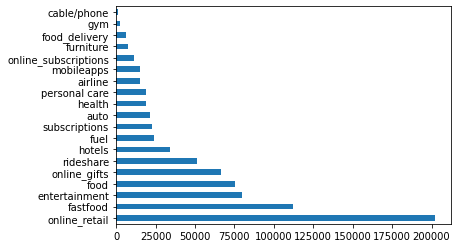

In [48]:
categoricalColumns["merchantCategoryCode"].value_counts().plot.barh();

In [49]:
merchantCategoryCode = dataset["merchantCategoryCode"].value_counts()
transactions = merchantCategoryCode.index
quantity = merchantCategoryCode.values
figure = px.pie(dataset, values=quantity, names=transactions, hole = 0.5, title="Satıcıların Kategorilerine Göre işlemlerin Dağılımı")
figure.show()

Kategorik Değikenlerin gruplara göre sayıları gösterilmiştir.

In [50]:
selectedColumns = ['transactionType', 'acqCountry', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode']
(pd.DataFrame(
    dataset[selectedColumns]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column               value                       
acqCountry           PR                      1538
                     CAN                     2424
                     MEX                     3130
                     US                    774709
merchantCategoryCode cable/phone             1382
                     gym                     2209
                     food_delivery           6000
                     furniture               7432
                     online_subscriptions   11067
                     mobileapps             14990
                     airline                15412
                     personal care          18964
                     health                 19092
                     auto                   21651
                     subscriptions          22901
                     fuel                   23910
                     hotels                 34097
                     rideshare              51136
                     online_gifts           66238
                     food                   75490
                     entertainment          80098
                     fastfood              112138
                     online_retail         202156
posConditionCode     99                      7533
                     08                    149634
                     01                    628787
posEntryMode         80                     15283
                     90                     19576
                     02                    195934
                     09                    236481
                     05                    315035
transactionType      ADDRESS_VERIFICATION   20169
                     REVERSAL               20303
                     PURCHASE              745193

## Veri setinin özniteliklerinin arasındaki ilişkinin incelenmesi

In [51]:
dataset.corr()

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
creditLimit,1.00e+00,8.35e-01,5.58e-03,6.54e-01,-3.93e-03,2.39e-03,3.11e-03
availableMoney,8.35e-01,1.00e+00,-1.01e-02,1.29e-01,2.51e-03,4.07e-03,-1.54e-03
transactionAmount,5.58e-03,-1.01e-02,1.00e+00,2.39e-02,3.74e-02,1.75e-03,7.57e-02
currentBalance,6.54e-01,1.29e-01,2.39e-02,1.00e+00,-1.05e-02,-1.28e-03,7.72e-03
cardPresent,-3.93e-03,2.51e-03,3.74e-02,-1.05e-02,1.00e+00,4.04e-02,-4.34e-02
expirationDateKeyInMatch,2.39e-03,4.07e-03,1.75e-03,-1.28e-03,4.04e-02,1.00e+00,-9.72e-04
isFraud,3.11e-03,-1.54e-03,7.57e-02,7.72e-03,-4.34e-02,-9.72e-04,1.00e+00


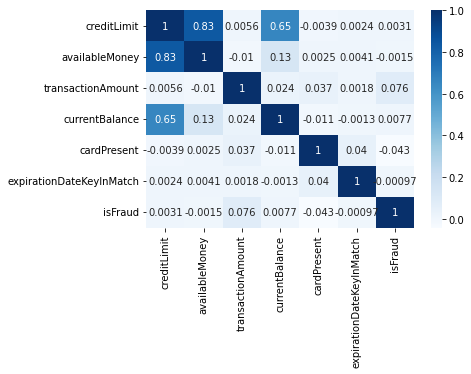

In [52]:
sns.heatmap(dataset.corr(), annot=True, cmap="Blues");

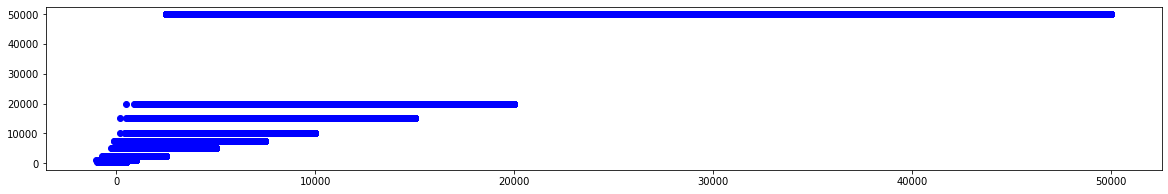

In [53]:
plt.figure(figsize=(20,3))
plt.scatter(dataset['availableMoney'], dataset['creditLimit'], c='blue');

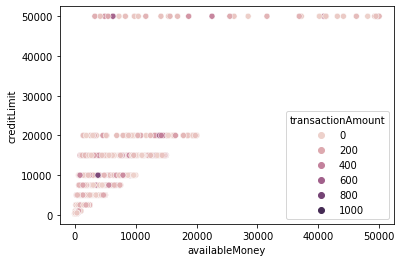

In [54]:
sns.scatterplot(x="availableMoney", y="creditLimit", hue="transactionAmount", data=dataset.sample(frac=0.001));

Sayısal Değişkenlerin Dağılımı gösterilmiştir.

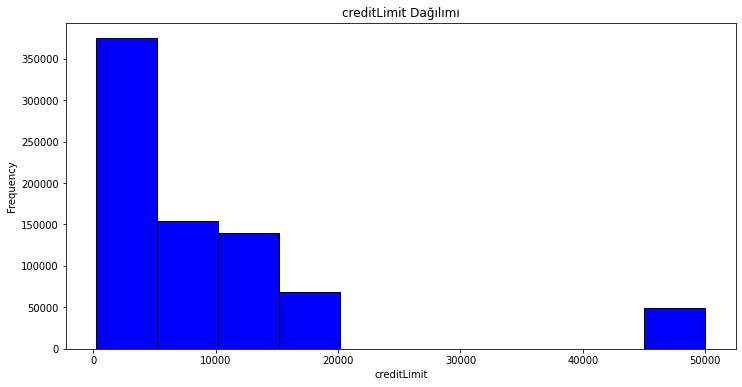

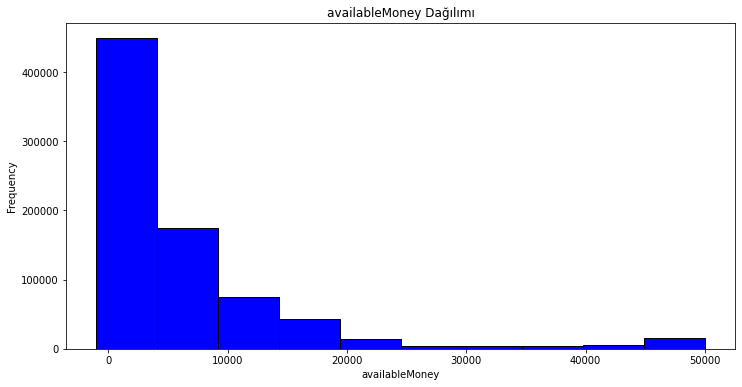

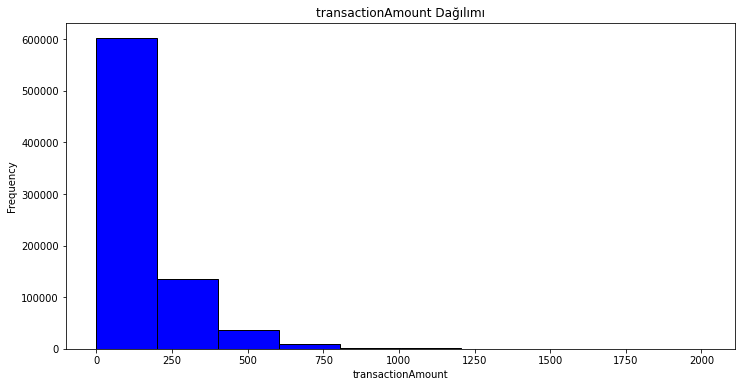

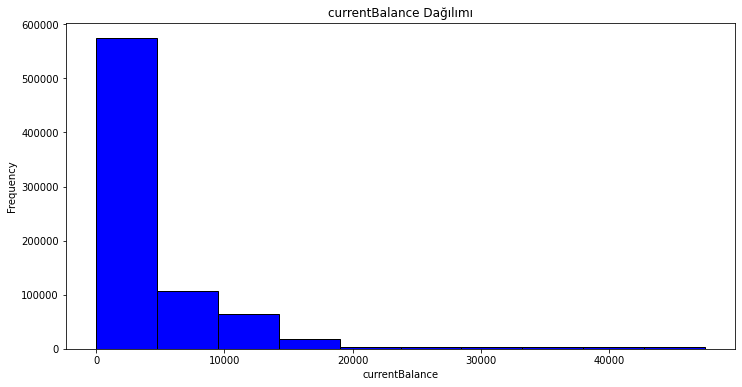

In [55]:
columns=['creditLimit','availableMoney','transactionAmount','currentBalance']

for column in columns:
    plt.xlabel(column)
    dataset[column].plot(kind='hist', bins=10, figsize=(12,6), facecolor='blue',edgecolor='black')
    plt.title(f"{column} Dağılımı")
    plt.show();

# **Özellik Ölçekleme**

Aralarında değer farkı çok yüksek olan özellikleri ölçekleyerek, aralarındaki sayısal farkı azaltmış olduk.

In [56]:
from sklearn import preprocessing

In [57]:
numericColumns = dataset.loc[:, ['creditLimit','availableMoney','transactionAmount','currentBalance']]
norm = preprocessing.MinMaxScaler().fit(numericColumns)
datasetNorm = norm.transform(numericColumns)
datasetNorm

array([[0.09547739, 0.11774445, 0.04899231, 0.        ],
       [0.09547739, 0.11774445, 0.03704127, 0.        ],
       [0.09547739, 0.11774445, 0.00371357, 0.        ],
       ...,
       [1.        , 0.97580953, 0.02457321, 0.02597644],
       [1.        , 0.97484042, 0.02480189, 0.0270171 ],
       [1.        , 0.9738623 , 0.03588296, 0.02806744]])

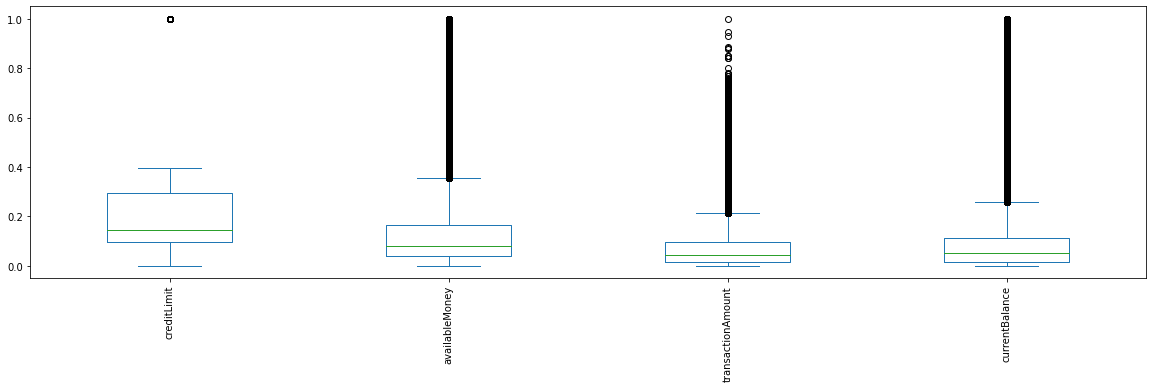

In [58]:
pd.DataFrame(datasetNorm, columns=numericColumns.columns).plot.box(figsize=(20,5), rot=90);

In [59]:
numericColumns = dataset.loc[:, ['creditLimit','availableMoney','transactionAmount','currentBalance']]
norm = preprocessing.StandardScaler().fit(numericColumns)
datasetStd = norm.transform(numericColumns)
datasetStd

array([[-0.49496232, -0.14083511, -0.2601839 , -0.69822414],
       [-0.49496232, -0.14083511, -0.42291819, -0.69822414],
       [-0.49496232, -0.14083511, -0.87673295, -0.69822414],
       ...,
       [ 3.37229037,  4.78735343, -0.59269257, -0.50714991],
       [ 3.37229037,  4.78178747, -0.58957868, -0.49949517],
       [ 3.37229037,  4.77616972, -0.43869069, -0.4917692 ]])

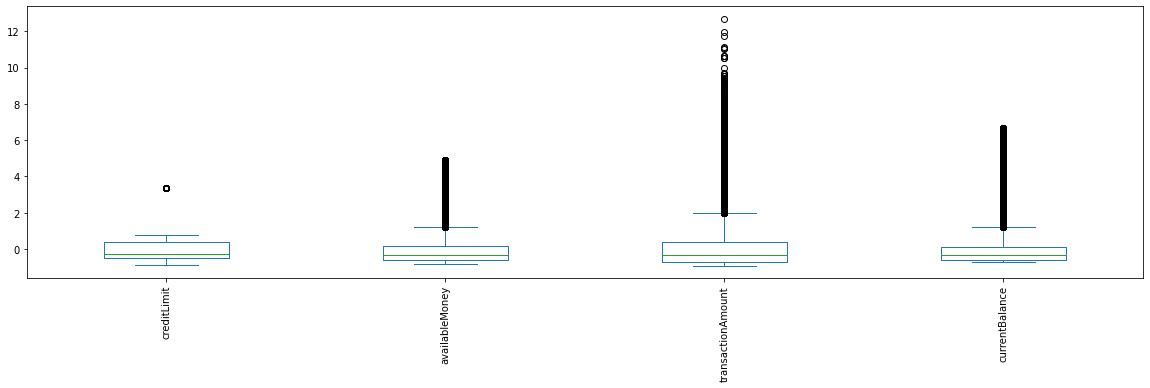

In [60]:
pd.DataFrame(datasetStd, columns=numericColumns.columns).plot.box(figsize=(20,5), rot=90);